# AAL S&M Sales Analysis Report

The following report intends to analyze the statistial data of Q4 2020 sales in order to determine the states generating the highest revenue, and - using what we can learn from them - to promote sales & increase profits in lower performing states. The analysis report is partitioned into three (3) sections:

1. Data Wrangling
2. Data Analysis
3. Data Visualization

## Data Wrangling

The database has no missing nor erroneous data values that would risk skewering our analysis. In any case of missing statistics, the select data should be dropped as long as the total number of samples missing any piece of data is negligible, and should otherwise be corrected if possible. Filling in missing values is also possible, but it is ill-advised as it may be poorly portrayed and disturb the result.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('AusApparalSales4thQrt2020.csv')

print(df.info())    # 7560 entries, 7560 non-null count on all columns

# Uncomment the line below to double check
# print(df.isna().sum())

# Uncomment the lines below to check for spelling, case sensitivity, or generally other erroneous values
"""
print(df['Date'].unique())
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())
"""

""" Uncomment the line below to drop any items with missing values.
Preferable to use this when the number of data samples with missing
values is not outstanding """
# df_rev = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


' Uncomment the line below to drop any items with missing values.\nPreferable to use this when the number of data samples with missing\nvalues is not outstanding '

We've formatted the data via min-max normalization on numerical data. Note how both the unit & sales share the same values with each other when normalized.

We also suggest focusing our attention in dates and states, as these categories show the highest volatility within their subgroups in sales & unit - demonstrated below.

In [2]:
df['MM_Unit'] = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())
df['MM_Sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())

# Printing only first 15 rows to minimize output space, but the min-max values in Sales & Unit are identitical throughout
print(df[['MM_Unit', 'MM_Sales']].head(15))

print(df.groupby('State')[['Sales', 'Unit', 'MM_Sales', 'MM_Unit']].mean())
print(df.groupby('Date')[['Sales', 'Unit', 'MM_Sales', 'MM_Unit']].mean().head(10))

     MM_Unit  MM_Sales
0   0.095238  0.095238
1   0.095238  0.095238
2   0.031746  0.031746
3   0.206349  0.206349
4   0.015873  0.015873
5   0.126984  0.126984
6   0.015873  0.015873
7   0.142857  0.142857
8   0.206349  0.206349
9   0.206349  0.206349
10  0.015873  0.015873
11  0.126984  0.126984
12  0.174603  0.174603
13  0.047619  0.047619
14  0.031746  0.031746
              Sales       Unit  MM_Sales   MM_Unit
State                                             
NSW    69416.666667  27.766667  0.408995  0.408995
NT     20907.407407   8.362963  0.100999  0.100999
QLD    30942.129630  12.376852  0.164712  0.164712
SA     54497.685185  21.799074  0.314271  0.314271
TAS    21074.074074   8.429630  0.102058  0.102058
VIC    97745.370370  39.098148  0.588859  0.588859
WA     20511.574074   8.204630  0.098486  0.098486
                    Sales       Unit  MM_Sales   MM_Unit
Date                                                    
1-Dec-2020   53154.761905  21.261905  0.305745  0.305745
1-

## Data Analysis

The following is the measurement of central tendency and dispersion for the sale price & number of units sold. Note again how the min-max formats are identitical to each other in every measurement.

In [3]:
SalesUnit = df[['Sales', 'Unit', 'MM_Sales', 'MM_Unit']]

# Measurement of Central Tendency
print(f"Mean:\n{SalesUnit.mean()}\n")
print(f"Median:\n{SalesUnit.median()}\n")
print(f"Mode:\n{SalesUnit.mode()}\n")

# Standard Deviation & Variance
print(f"Standard Deviation:\n{SalesUnit.std()}\n")
print(f"Variance:\n{SalesUnit.var()}\n")

QUARTER = 0.25
# Quartiles
for i in range(1,4):
    # Q1 & Q3 for IQR
    if i == 1:
        q1 = SalesUnit.quantile(QUARTER * i)
    elif i == 3:
        q3 = SalesUnit.quantile(QUARTER * i)
    
    print(f"Q{i}:\n{SalesUnit.quantile(QUARTER * i)}\n")

print(f"IQR:\n{q3 - q1}")

Mean:
Sales       45013.558201
Unit           18.005423
MM_Sales        0.254054
MM_Unit         0.254054
dtype: float64

Median:
Sales       35000.000000
Unit           14.000000
MM_Sales        0.190476
MM_Unit         0.190476
dtype: float64

Mode:
   Sales  Unit  MM_Sales   MM_Unit
0  22500     9  0.111111  0.111111

Standard Deviation:
Sales       32253.506944
Unit           12.901403
MM_Sales        0.204784
MM_Unit         0.204784
dtype: float64

Variance:
Sales       1.040289e+09
Unit        1.664462e+02
MM_Sales    4.193656e-02
MM_Unit     4.193656e-02
dtype: float64

Q1:
Sales       20000.000000
Unit            8.000000
MM_Sales        0.095238
MM_Unit         0.095238
Name: 0.25, dtype: float64

Q2:
Sales       35000.000000
Unit           14.000000
MM_Sales        0.190476
MM_Unit         0.190476
Name: 0.5, dtype: float64

Q3:
Sales       65000.000000
Unit           26.000000
MM_Sales        0.380952
MM_Unit         0.380952
Name: 0.75, dtype: float64

IQR:
Sales       450

Further data analysis concludes that men generate the highest sales while seniors generate the lowest by a decent margin; likewise, Victoria (VIC) is the powerhouse of our revenue while Western Australia (WA) has the least amount of contribution towards it.

We've also provided a weekly, monthly, and quarterly summary of our sales & units sold. Note how revenue is lowest at November (numbered as month 11; weeks 44 to 48).

In [4]:
print(df.groupby('Group')[['Sales', 'MM_Sales']].mean())
print(df.groupby('State')[['Sales', 'MM_Sales']].mean())

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

print(f"WEEKLY SUMMARY:\n{df.groupby(df['Week']).agg({'Sales':'sum', 'Unit':'sum', 'MM_Sales':'mean', 'MM_Unit':'mean'})}\n")
print(f"MONTHTLY SUMMARY:\n{df.groupby(df['Month']).agg({'Sales':'sum', 'Unit':'sum', 'MM_Sales':'mean', 'MM_Unit':'mean'})}\n")
print(f"QUARTERLY SUMMARY:\n{df.agg({'Sales':'sum', 'Unit':'sum', 'MM_Sales':'mean', 'MM_Unit':'mean'}).apply(lambda x: '%.6f' % x)}")

                Sales  MM_Sales
Group                          
Kids     45011.904762  0.254044
Men      45370.370370  0.256320
Seniors  44464.285714  0.250567
Women    45207.671958  0.255287
              Sales  MM_Sales
State                        
NSW    69416.666667  0.408995
NT     20907.407407  0.100999
QLD    30942.129630  0.164712
SA     54497.685185  0.314271
TAS    21074.074074  0.102058
VIC    97745.370370  0.588859
WA     20511.574074  0.098486
WEEKLY SUMMARY:
         Sales   Unit  MM_Sales   MM_Unit
Week                                     
40    15045000   6018  0.252551  0.252551
41    27002500  10801  0.259826  0.259826
42    26640000  10656  0.255912  0.255912
43    26815000  10726  0.257802  0.257802
44    21807500   8723  0.242977  0.242977
45    20865000   8346  0.193554  0.193554
46    21172500   8469  0.196874  0.196874
47    21112500   8445  0.196226  0.196226
48    21477500   8591  0.200167  0.200167
49    29622500  11849  0.288117  0.288117
50    31525000  12

## Data Visualization

We've developed multiple figures for visualization purposes via Seaborn - a Python visualization library that specializes in statistic analysis.

The two figues below support our claims in the highest and lowest selling states & groups.

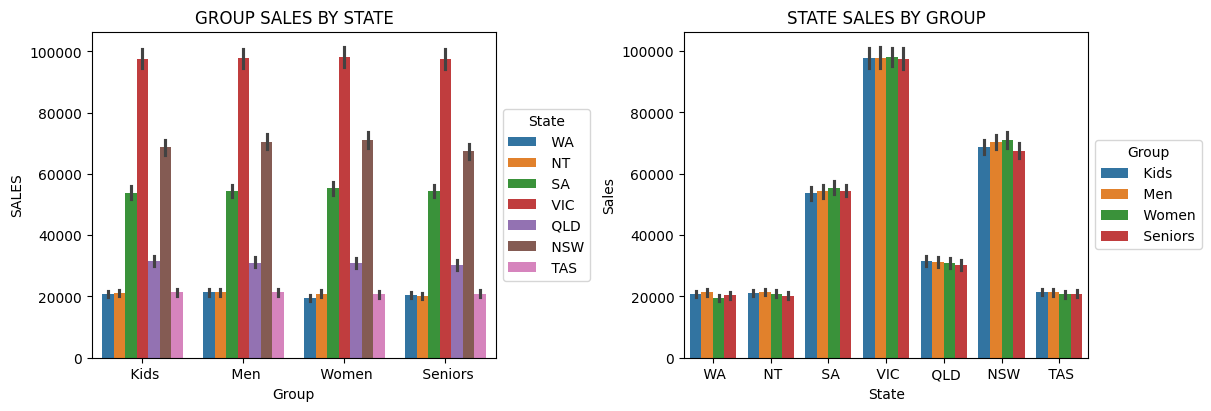

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4), layout='constrained')

# State-wise sales analysis for different groups
ax0 = sns.barplot(data=df, x='Group', y='Sales', hue='State', ax=axs[0])
sns.move_legend(ax0, "center left", bbox_to_anchor=(1, 0.5))
ax0.set_ylabel("SALES")
ax0.set_title("GROUP SALES BY STATE")

# Group-wise sales analysis across different states
ax1 = sns.barplot(data=df, x='State', y='Sales', hue='Group', ax=axs[1])
sns.move_legend(ax1, "center left", bbox_to_anchor=(1, 0.5))
ax0.set_ylabel("SALES")
ax1.set_title("STATE SALES BY GROUP")
plt.show()

The figures show sales based on the time of day; sales are lowest during evening hours, while morning and afternoon have little difference with each other. With a deeper analysis, we can find that sales are the highest during the morning hours by a slight margin.

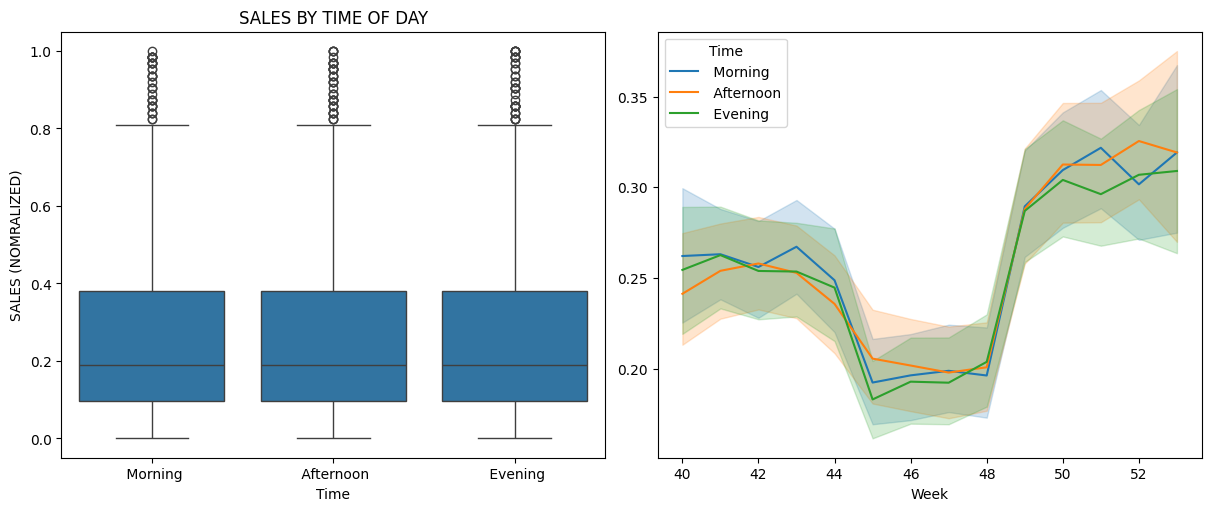

                  Sales  MM_Sales
Time                             
Afternoon  45241.071429  0.255499
Evening    44479.166667  0.250661
Morning    45320.436508  0.256003


In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5), layout='constrained')

ax0 = sns.boxplot(data=df, x='Time', y='MM_Sales', ax=axs[0])
ax0.set_ylabel("SALES (NOMRALIZED)")
ax0.set_title("SALES BY TIME OF DAY")
ax1 = sns.lineplot(data=df, x='Week', y='MM_Sales', hue='Time', ax=axs[1])
sns.move_legend(ax1, "upper left")
ax1.set_ylabel(None)
plt.show()

print(df.groupby('Time')[['Sales', 'MM_Sales']].mean())

Additionally, the figures below are the total number of sales by day, week, and month respectively. Sales are lowest in November and highest in December.

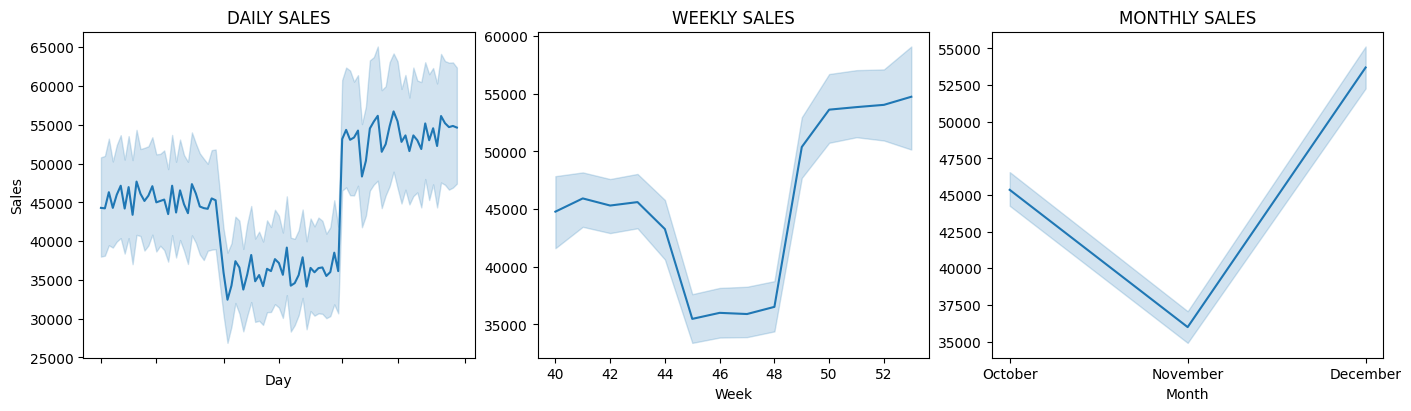

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4), layout='constrained')
ax0 = sns.lineplot(data=df, x=df['Date'], y='Sales', ax=axs[0])
ax0.set_title("DAILY SALES")
ax0.set_xlabel("Day")
ax0.set_xticklabels([])
ax1 = sns.lineplot(data=df, x='Week', y='Sales', ax=axs[1])
ax1.set_title("WEEKLY SALES")
ax1.set_ylabel(None)
ax2 = sns.lineplot(data=df, x=df['Date'].dt.month_name(), y='Sales', ax=axs[2])
ax2.set_title("MONTHLY SALES")
ax2.set_xlabel("Month")
ax2.set_ylabel(None)
plt.show()

Finally, below is the quantitative statistic of sales & units sold. This would be useful in budgeting supplies and determine unit price.

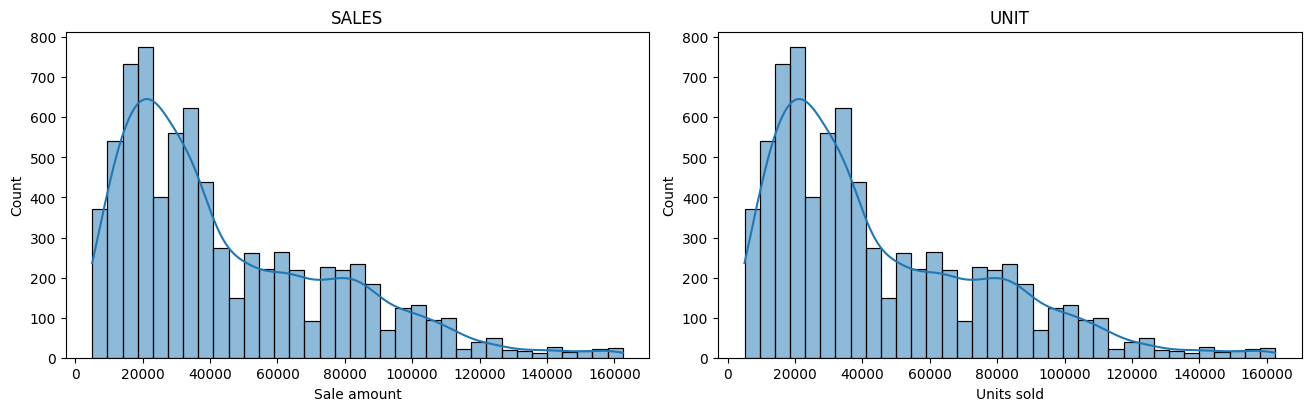

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4), layout='constrained')

ax0 = sns.histplot(data=df, x='Sales', kde=True, ax=axs[0])
ax0.set_title("SALES")
ax0.set_xlabel("Sale amount")
ax1 = sns.histplot(data=df, x='Sales', kde=True, ax=axs[1])
ax1.set_title("UNIT")
ax1.set_xlabel("Units sold")

plt.show()